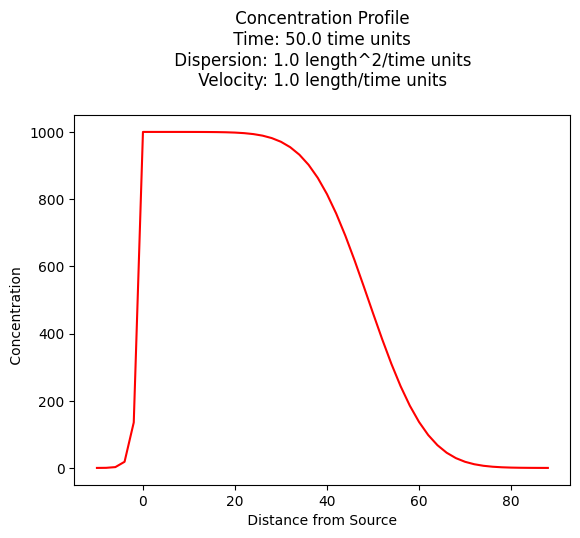

In [1]:
from math import sqrt,erf,erfc,exp  # get special math functions
#
# prototype sauty function
#
def sauty(c_source,injection,porosity,space,time,dispersion,velocity):
    term0 = (c_source*injection)/(2.0*porosity*velocity)
    term1 = exp( 0.5*velocity*space/dispersion)
    term3 = exp(-0.5*velocity*abs(space)/dispersion)
    term4 = erfc(((abs(space)-velocity*time))/(2.0*sqrt(dispersion*time)))
    term5 = exp( 0.5*velocity*abs(space)/dispersion)
    term6 = erfc(((abs(space)+velocity*time))/(2.0*sqrt(dispersion*time)))
    sauty = term0*term1*(term3*term4-term5*term6)
    return(sauty)
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 100.      # how far in X-direction to extend the plot
time  = 50.       # time since release
injection = 0.5   # injection volume rate
porosity = 0.5    # porosity
dispersion = 1.0  # dispersion coefficient
velocity = 1.0    # pore velocity
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltax = space/how_many_points
x = [(i-5)*deltax for i in range(how_many_points)] # constructor notation plot some -x values
c = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = sauty(c_source,injection,porosity,x[i],time,dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("sautyplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

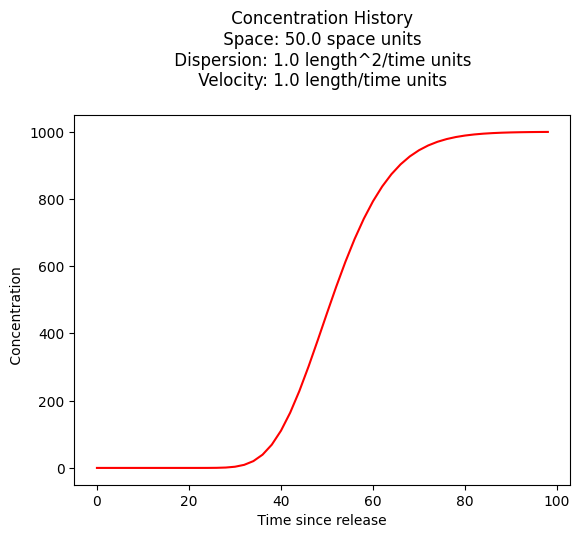

In [2]:
from math import sqrt,erf,erfc,exp  # get special math functions
#
# prototype ogatabanks function
#
def sauty(c_source,injection,porosity,space,time,dispersion,velocity):
    term0 = (c_source*injection)/(2.0*porosity*velocity)
    term1 = exp( 0.5*velocity*space/dispersion)
    term3 = exp(-0.5*velocity*abs(space)/dispersion)
    term4 = erfc(((abs(space)-velocity*time))/(2.0*sqrt(dispersion*time)))
    term5 = exp( 0.5*velocity*abs(space)/dispersion)
    term6 = erfc(((abs(space)+velocity*time))/(2.0*sqrt(dispersion*time)))
    sauty = term0*term1*(term3*term4-term5*term6)
    return(sauty)
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 50.      # how far in X-direction to extend the plot
time  = 100.       # time since release
injection = 0.5   # injection volume rate
porosity = 0.5    # porosity
dispersion = 1.0  # dispersion coefficient
velocity = 1.0    # pore velocity
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltat = time/how_many_points
t = [i*deltat for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation

t[0]=1e-5 #cannot have zero time, so use really small value first position in list
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = sauty(c_source,injection,porosity,space,t[i],dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration History \n Space: " + repr(space) + " space units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Time since release ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use